# NOTEBOOK FOR TESTING PURPOSE

In [2]:
from ocr_ktm import ocr_raw
import cv2
import re
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

In [9]:
def ocr_raw(image):
    # image = cv2.resize(image, (50 * 16, 500))

    img_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # img_gray = cv2.equalizeHist(img_gray)
    # img_gray = cv2.fastNlMeansDenoising(img_gray, None, 3, 7, 21)
    cv2.fillPoly(img_gray, pts=[np.asarray([(540, 150), (540, 499), (798, 499), (798, 150)])], color=(255, 255, 255))
    th, threshed = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TRUNC)
    result_raw = pytesseract.image_to_string(image, lang="ind")

    return result_raw

In [29]:
result_raw = ocr_raw(cv2.imread('image.jpg'))
nim = ''
nama = ''
ttl = ''
jurusan = ''
alamat = ''

lines = result_raw.split('\n')

# for i in lines:
#     print(i)

# remove empty lines
lines = list(filter(lambda x: x != '', lines))

# Find NIM and its index
nim_index = next((i for i, line in enumerate(lines) if re.match(r'^\d+$', line)), None)
nim = lines[nim_index]

# Extract other information based on the index of NIM
if nim_index + 1 < len(lines):
    nama = lines[nim_index + 1]

if nim_index + 2 < len(lines):
    ttl = lines[nim_index + 2]

if nim_index + 3 < len(lines):
    jurusan = lines[nim_index + 3]

if nim_index + 4 < len(lines):
    alamat = ' '.join(lines[nim_index + 4:])

print('nim: ' + nim)
print('nama: ' + nama)
print('ttl: ' + ttl)
print('jurusan: ' + jurusan)
print('alamat: ' + alamat)

nim: 2141720199
nama: DINA MAULIDATUR RAHMA
ttl: JOMBANG, 5 November 2002
jurusan: D-IV T. INFORMATIKA
alamat: DSN. BENDET 5/3 BENDET KEC. DIWEK KAB. JOMBANG


## OCR Dengan Countour Detection

Extracted text: a
Extracted text: 
Extracted text: 
Extracted text: 
Extracted text: 
Extracted text: 
Extracted text: 
Extracted text: 
Extracted text: 
Extracted text: 
Extracted text: 
Extracted text: 
Extracted text: 
Extracted text: 
Extracted text: 
Extracted text: 
Extracted text: 
Extracted text: 
Extracted text: 
Extracted text: 
Extracted text: 
Extracted text: ae
Extracted text: 
Extracted text: 
Extracted text: 
Extracted text: 
Extracted text: 
Extracted text: 
Extracted text: 
Extracted text: 
Extracted text: 
Extracted text: 
Extracted text: 
Extracted text: 
Extracted text: (/
Extracted text: (/
Extracted text: ff
Extracted text: ‘oi:

Extracted text: ‘oi:
Extracted text: fed
Extracted text: 
Extracted text: 
Extracted text: fos
Extracted text: ‘a4
Extracted text: oie}
Extracted text: ro.

Extracted text: eg}
Extracted text: /}
Extracted text: 
Extracted text: 
Extracted text: 
Extracted text: -.

Extracted text: a,
Extracted text: a,
Extracted text: )
Extracted text: a

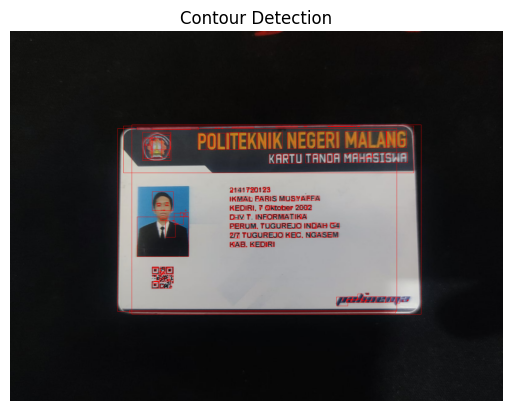

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

# Read the image
img = cv2.imread('image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Apply Gaussian Blur
blurred = cv2.GaussianBlur(gray, (3, 3), 1)

# Apply Otsu's thresholding
ret, thresh = cv2.threshold(blurred.copy(), 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Create a copy of the original image
detected = img.copy()

# Apply Canny edge detection
edged = cv2.Canny(thresh, 16, 16)

# Find contours in the edged image
contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through the contours
for contour in contours:
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    
    x, y, w, h = cv2.boundingRect(contour)
    
    # Draw rectangles on the detected image
    cv2.rectangle(gray, (x, y), (x + w, y + h), (255, 0, 0), 1)
    
    # Extract text using pytesseract
    roi = edged[y:y + h, x:x + w]
    text = pytesseract.image_to_string(roi, config='--psm 6')  # --psm 6 assumes a block of text
    print(f"Extracted text: {text}, {area}, {perimeter}")

# Display the images
plt.imshow(detected, cmap='gray')
plt.title("Contour Detection")
plt.axis('off')

plt.show()


## Testing with premade Model

In [1]:
from keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

# Load the model
model = load_model('models/network')
img = cv2.imread('image.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur
blurred = cv2.GaussianBlur(gray, (3, 3), 1)

# Apply Otsu's thresholding
ret, thresh = cv2.threshold(blurred.copy(), 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Create a copy of the original image
detected = img.copy()

# Apply Canny edge detection
edged = cv2.Canny(thresh, 16, 16)

# Find contours in the edged image
contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through the contours
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    
    # Draw rectangles on the detected image
    cv2.rectangle(detected, (x, y), (x + w, y + h), (255, 0, 0), 1)
    
    # Extract text using the model
    roi = gray[y:y + h, x:x + w]
    roi = cv2.resize(roi, (28, 28))
    roi = np.expand_dims(roi, axis=0)
    roi = np.expand_dims(roi, axis=-1)
    roi = roi / 255.0
    pred = model.predict(roi)
    text = str(np.argmax(pred))
    print(f"Extracted text: {text}")

1/1 [==============================] - 0s 487ms/step
Extracted text: 13
1/1 [==============================] - 0s 59ms/step
Extracted text: 13
1/1 [==============================] - 0s 64ms/step
Extracted text: 13
1/1 [==============================] - 0s 75ms/step
Extracted text: 13
1/1 [==============================] - 0s 46ms/step
Extracted text: 13
1/1 [==============================] - 0s 89ms/step
Extracted text: 13
1/1 [==============================] - 0s 58ms/step
Extracted text: 13
1/1 [==============================] - 0s 45ms/step
Extracted text: 13
1/1 [==============================] - 0s 52ms/step
Extracted text: 13
1/1 [==============================] - 0s 53ms/step
Extracted text: 13
1/1 [==============================] - 0s 58ms/step
Extracted text: 13
1/1 [==============================] - 0s 54ms/step
Extracted text: 13
1/1 [==============================] - 0s 53ms/step
Extracted text: 13
1/1 [==============================] - 0s 56ms/step
Extracted text: 13
1/1 [

(-0.5, 1599.5, 1200.5, -0.5)

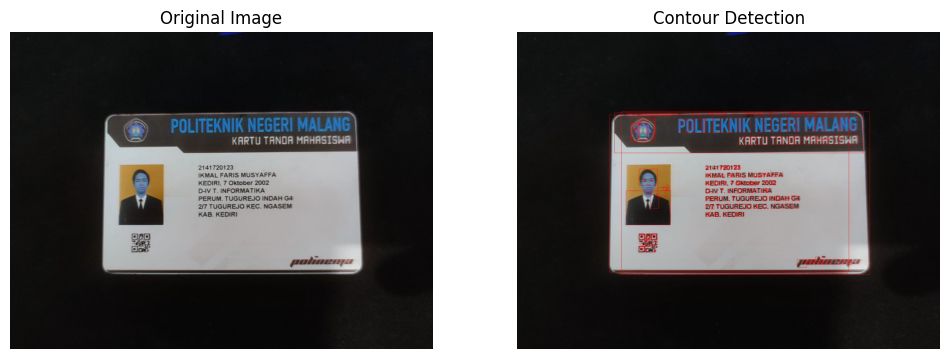

In [10]:
# Display the images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(detected, cmap='gray')
plt.title("Contour Detection")
plt.axis('off')

# REAL TEST CUY

In [28]:
from keras.models import load_model
import cv2
import matplotlib.pyplot as plt
import numpy as np
from imutils.contours import sort_contours
import imutils

In [29]:
# Load saved network
load_network = load_model('models/network')

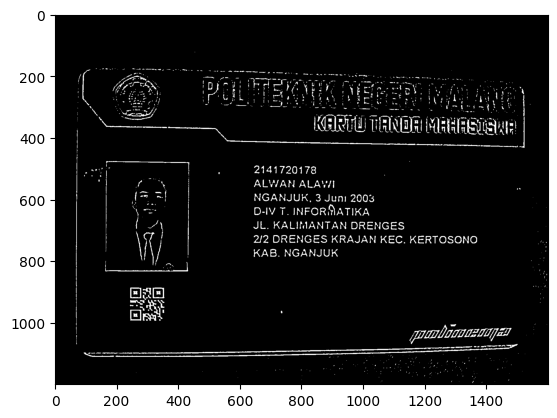

In [30]:
# load Image and pre-process
img = cv2.imread('image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
adaptive = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
invertion = 255 - adaptive
dilation = cv2.dilate(invertion, np.ones((3,3)))
edges = cv2.Canny(dilation, 40, 150)
erode = cv2.erode(invertion, np.ones((1,1)))
# cv2.imshow('image', erode)
# cv2.namedWindow('image', cv2.WINDOW_KEEPRATIO)
# cv2.resizeWindow('image', 600, 600)
# cv2.waitKey(0)
plt.imshow(erode, cmap='gray')

In [31]:
# Define function for contour detection
def find_contours(img):
  conts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  conts = imutils.grab_contours(conts)
  conts = sort_contours(conts, method='left-to-right')[0]

  return conts

def extract_roi(img):
  roi = img[y:y+h, x:x+w]

  return roi

def thresholding(img):
  thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  return thresh

def resize_img(img, w, h):
  if w > h:
    resized = imutils.resize(img, width=28)
  else:
    resized = imutils.resize(img, height=28)

  # (w, h) = resized.shape
  (h, w) = resized.shape

  # Calculate how many pixels need to fill char image
  dX = int(max(0, 28 - w) / 2.0)
  dY = int(max(0, 28 - h) / 2.0)

  filled = cv2.copyMakeBorder(resized, top=dY, bottom=dY, right=dX, left=dX, borderType=cv2.BORDER_CONSTANT, value=(0,0,0))
  filled = cv2.resize(filled, (28,28))

  return filled

def normalization(img):
  img = img.astype('float32') / 255.0 # convert to floating point
  img = np.expand_dims(img, axis=-1) # add depth
  return img

def process_box(gray, x, y, w, h):
  roi = extract_roi(gray)
  thresh = thresholding(roi)
  (h, w) = thresh.shape
  resized = resize_img(thresh, w, h)
  normalized = normalization(resized)
  return (normalized, (x, y, w, h))

In [32]:
# Find contours
conts = find_contours(erode)

# Create a copy of the original image
detected = img.copy()

# Iterate through the contours
for contour in conts:
    x, y, w, h = cv2.boundingRect(contour)
    
    # Draw rectangles on the detected image
    cv2.rectangle(detected, (x, y), (x + w, y + h), (255, 0, 0), 1)
    
    # Extract text using the model
    roi = gray[y:y + h, x:x + w]
    roi = cv2.resize(roi, (28, 28))
    roi = np.expand_dims(roi, axis=0)
    roi = np.expand_dims(roi, axis=-1)
    roi = roi / 255.0
    pred = load_network.predict(roi)
    text = str(np.argmax(pred))
    print(f"Extracted text: {text}")

1/1 [==============================] - 0s 125ms/step
Extracted text: 13
1/1 [==============================] - 0s 36ms/step
Extracted text: 13
1/1 [==============================] - 0s 33ms/step
Extracted text: 13
1/1 [==============================] - 0s 35ms/step
Extracted text: 13
1/1 [==============================] - 0s 35ms/step
Extracted text: 13
1/1 [==============================] - 0s 33ms/step
Extracted text: 13
1/1 [==============================] - 0s 35ms/step
Extracted text: 13
1/1 [==============================] - 0s 33ms/step
Extracted text: 13
1/1 [==============================] - 0s 39ms/step
Extracted text: 13
1/1 [==============================] - 0s 33ms/step
Extracted text: 13
1/1 [==============================] - 0s 38ms/step
Extracted text: 13
1/1 [==============================] - 0s 34ms/step
Extracted text: 13
1/1 [==============================] - 0s 32ms/step
Extracted text: 13
1/1 [==============================] - 0s 31ms/step
Extracted text: 13
1/1 [

(-0.5, 1599.5, 1199.5, -0.5)

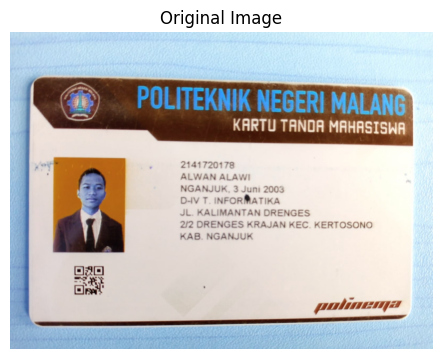

In [33]:
# Display the images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Conclusion

Pytesseract is still the best method compared to the other two.
**Note:**  
Resized the image can cut the extraction time by a lot, but it can also significantly reduce the accuracy of the result.